<a href="https://colab.research.google.com/github/angelomarcelino/machine_learning/blob/main/q3_espirals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Questão 3
Considere o problema de classificação de padrões constituído por duas espirais intercaladas. A espiral 1 sendo a classe 1 e a espiral 2 sendo a classe 2. Gere os exemplos de treinamento usando as seguintes equações:

para espiral 1, $x = \dfrac{\theta}{4}\text{cos}\theta$ &nbsp;&nbsp;&nbsp;&nbsp; $y = \dfrac{\theta}{4}\text{sen}\theta$ &nbsp;&nbsp;&nbsp;&nbsp; $\theta \geq 0$


para espiral 2, $x = (\dfrac{\theta}{4} + 0.8)\text{cos}\theta$ &nbsp;&nbsp;&nbsp;&nbsp; $y = (\dfrac{\theta}{4} + 0.8)\text{sen}\theta$ &nbsp;&nbsp;&nbsp;&nbsp; $\theta \geq 0$


fazendo $\theta$ assumir valores igualmente espaçados entre 0 e 20 radianos. Compare o desempenho das soluções com base na matriz de confusão. Pesquise e utilize uma rede convolutiva já treinada. 

In [74]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np

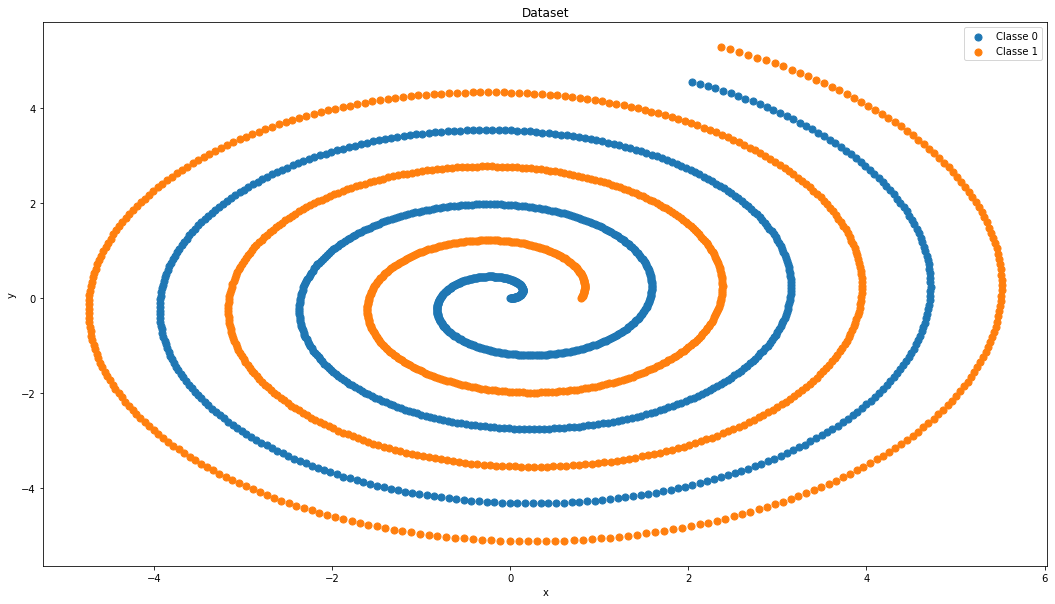

In [75]:
# Definindo as espirais
theta = np.linspace(0, 20, 1000)

x1, y1 = ((theta/4)*np.cos(theta), (theta/4)*np.sin(theta))
x2, y2 = (((theta/4)+.8)*np.cos(theta), ((theta/4)+.8)*np.sin(theta))

fig, axes = plt.subplots(figsize=(18, 10))

axes.scatter(x1, y1, s=50, label='Classe 0')
axes.scatter(x2, y2, s=50, label='Classe 1')

axes.set(
    title='Dataset',
    xlabel='x',
    ylabel='y'
)

plt.legend()
plt.show()

### Feature Engineering

Mais duas features serão adicionadas ao dataset com o objetivo de ajudar a modelegem do problema, são elas $arctan2(y, x)$ e $\sqrt{x^2 + y^2}$ que equivalem a transformação em coordenadas esféricas.

In [76]:
import pandas as pd

x = np.concatenate([x1, x2])
y = np.concatenate([y1, y2])

dataset = pd.DataFrame({
    'x': x,
    'y': y,
    'x2': x**2,
    'y2': y**2,
    'arctan': np.arctan2(y, x),
    'norm': np.sqrt(x**2 + y**2),
    'label': [0]*len(theta) + [1]*len(theta) 
})

x_train, x_test, y_train, y_test = train_test_split(dataset.drop(['label'], axis=1), dataset['label'], test_size=0.2, random_state=505)
x_train.drop(['x', 'y'], axis=1, inplace=True)

dataset.head()

,x,y,x2,y2,arctan,norm,label
0,0.000000,0.000000,0.000000,0.000000e+00,0.00000,0.000000,0
1,0.005004,0.000100,0.000025,1.003876e-08,0.02002,0.005005,0
2,0.010002,0.000401,0.000100,1.605558e-07,0.04004,0.010010,0
3,0.014988,0.000901,0.000225,8.122707e-07,0.06006,0.015015,0
4,0.019956,0.001601,0.000398,2.564776e-06,0.08008,0.020020,0


Solucione este problema considerando: 

#### a) Um rede perceptron de múltiplas camadas

In [77]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

mlp = Sequential([
    Dense(32, activation='relu', input_shape=(4,)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(2, activation='relu'),
    Dense(1, activation='tanh')
])

mlp.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

mlp.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                160       
_________________________________________________________________
dense_13 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_15 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_16 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 3         
Total params: 873
Trainable params: 873
Non-trainable params: 0
________________________________________________________

In [78]:
from tensorflow.keras.callbacks import EarlyStopping

history = mlp.fit(
     x_train, y_train,
    epochs=500,
    validation_split=0.1,
    callbacks=[EarlyStopping(monitor='val_loss', patience=10)]
)

 - val_accuracy: 0.8375
Epoch 41/500
45/45 [==============================] - 0s 3ms/step - loss: 0.2076 - accuracy: 0.8958 - val_loss: 0.2741 - val_accuracy: 0.8562
Epoch 42/500
45/45 [==============================] - 0s 3ms/step - loss: 0.2067 - accuracy: 0.8951 - val_loss: 0.2692 - val_accuracy: 0.8562
Epoch 43/500
45/45 [==============================] - 0s 3ms/step - loss: 0.2033 - accuracy: 0.8986 - val_loss: 0.2682 - val_accuracy: 0.8562
Epoch 44/500
45/45 [==============================] - 0s 3ms/step - loss: 0.2017 - accuracy: 0.8993 - val_loss: 0.2565 - val_accuracy: 0.8562
Epoch 45/500
45/45 [==============================] - 0s 2ms/step - loss: 0.1994 - accuracy: 0.9000 - val_loss: 0.2545 - val_accuracy: 0.8500
Epoch 46/500
45/45 [==============================] - 0s 3ms/step - loss: 0.1959 - accuracy: 0.9000 - val_loss: 0.2490 - val_accuracy: 0.8562
Epoch 47/500
45/45 [==============================] - 0s 3ms/step - loss: 0.1998 - accuracy: 0.9028 - val_loss: 0.2922 - val

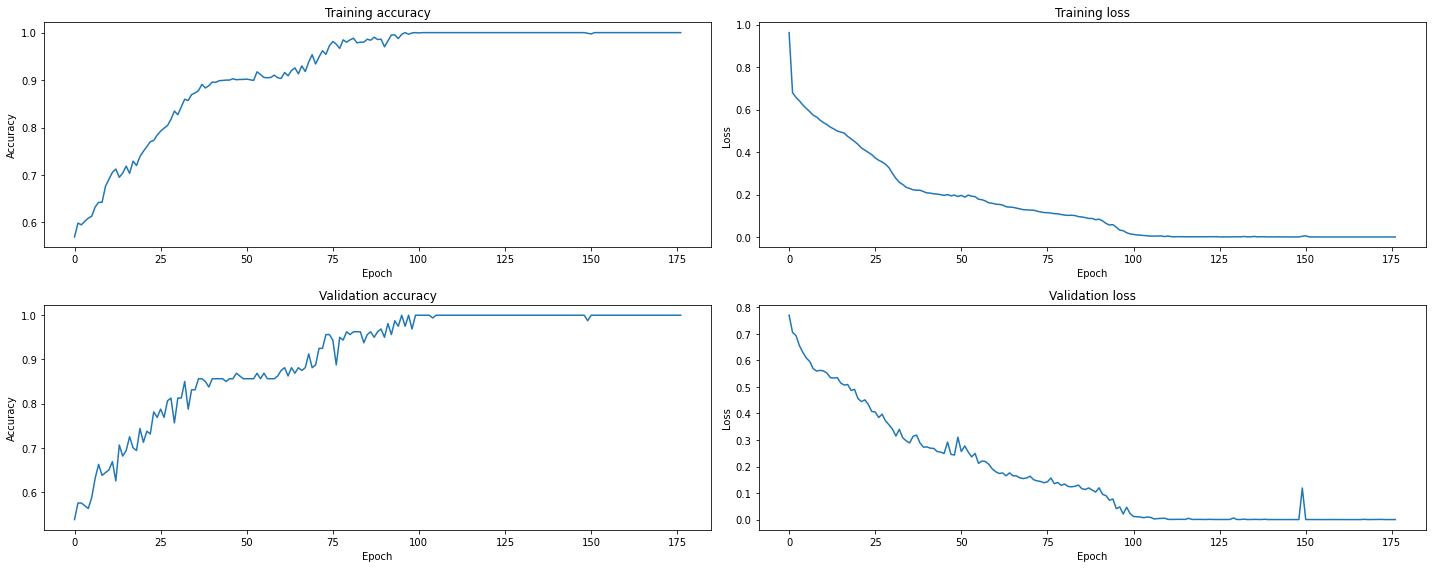

In [79]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 8))
axes = axes.flatten()

axes[0].plot(history.history['accuracy'])

axes[0].set(
    title='Training accuracy',
    ylabel='Accuracy',
    xlabel='Epoch'
)

axes[1].plot(history.history['loss'])

axes[1].set(
    title='Training loss',
    ylabel='Loss',
    xlabel='Epoch'
)

axes[2].plot(history.history['val_accuracy'])

axes[2].set(
    title='Validation accuracy',
    ylabel='Accuracy',
    xlabel='Epoch'
)

axes[3].plot(history.history['val_loss'])

axes[3].set(
    title='Validation loss',
    ylabel='Loss',
    xlabel='Epoch'
)

plt.tight_layout()
plt.show()

In [80]:
from sklearn.metrics import classification_report

y_pred_mlp = mlp.predict_classes(x_test.drop(['x', 'y'], axis=1)).reshape((len(y_test),))

print('MLP:\n', classification_report(y_test, y_pred_mlp))




MLP:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       206
           1       1.00      1.00      1.00       194

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



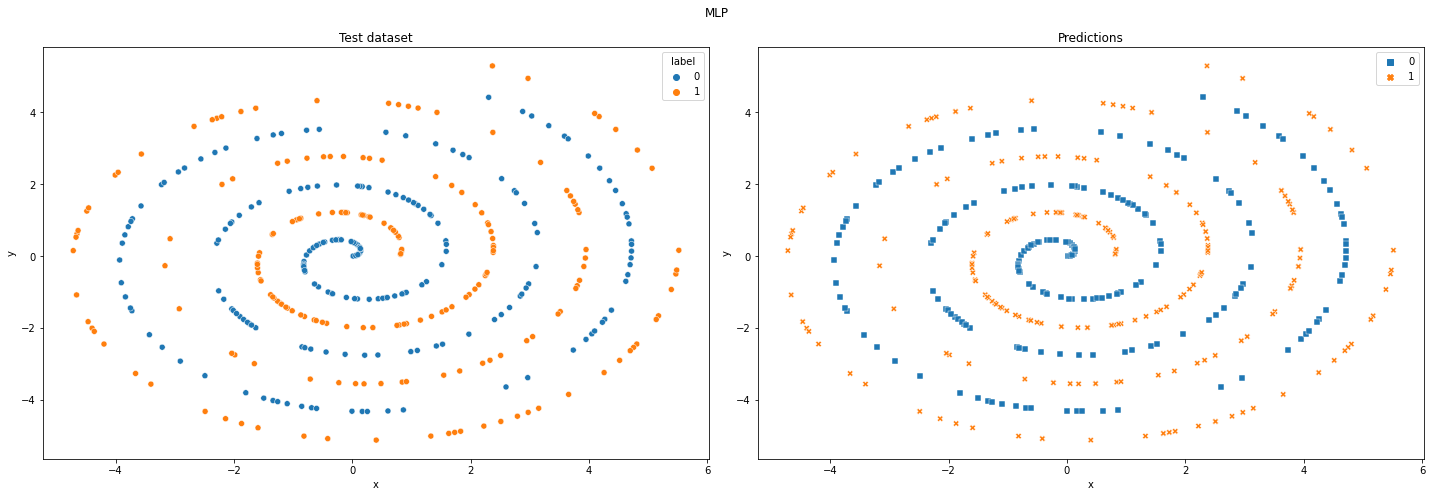

In [81]:
import seaborn as sns

def test_plot(y_pred, clf):
    fig, axes = plt.subplots(ncols=2, figsize=(20, 7))

    fig.suptitle(clf)

    sns.scatterplot(data=x_test, x='x', y='y', hue=y_test, ax=axes[0])

    axes[0].set(
        title='Test dataset',
        xlabel='x',
        ylabel='y'
    )

    sns.scatterplot(
        data=x_test, x='x', y='y', 
        markers={0: 's', 1: 'X'},
        style=y_pred,
        hue=y_pred,
        ax=axes[1]
    )

    axes[1].set(
        title='Predictions',
        xlabel='x',
        ylabel='y'
    )

    plt.tight_layout()
    plt.show()

test_plot(y_pred_mlp, 'MLP')

#### b) Uma máquina de vetor de suporte (SVM)

In [82]:
from sklearn.svm import SVC

svm = SVC()

svm.fit(x_train, y_train)

y_pred_svm = svm.predict(x_test.drop(['x', 'y'], axis=1))

print('SVM:\n', classification_report(y_test, y_pred_svm))

SVM:
               precision    recall  f1-score   support

           0       0.51      0.44      0.47       206
           1       0.48      0.55      0.51       194

    accuracy                           0.49       400
   macro avg       0.50      0.50      0.49       400
weighted avg       0.50      0.49      0.49       400



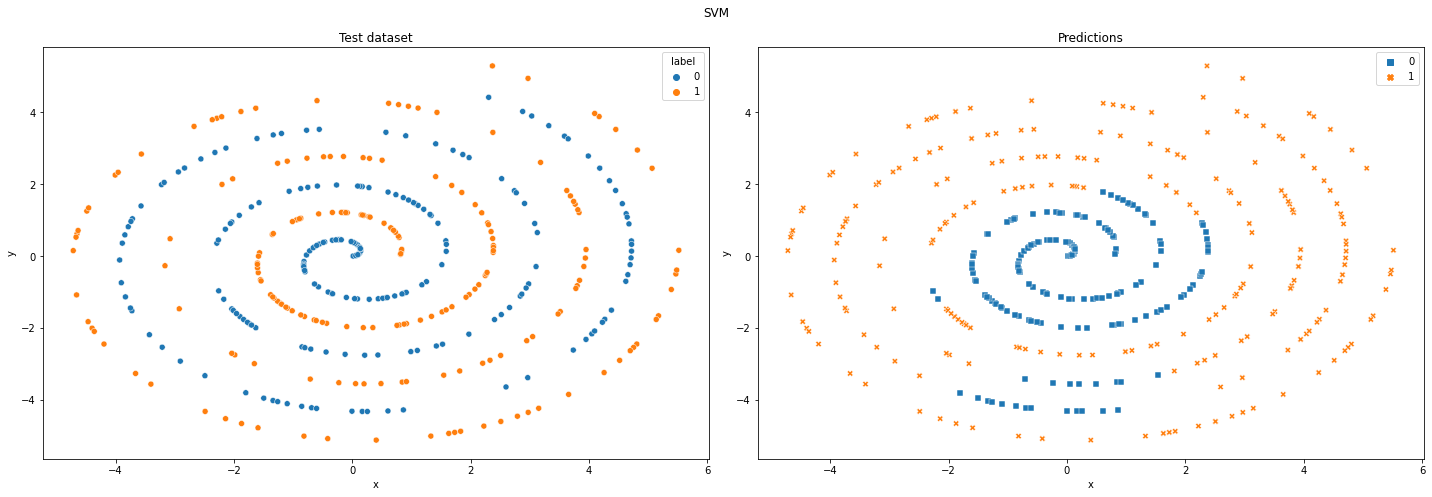

In [83]:
test_plot(y_pred_svm, 'SVM')

#### c) Um comitê de máquinas

In [84]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
import xgboost as xgb

rf = RandomForestClassifier(
    max_features='sqrt',
    min_samples_split=5,
    min_samples_leaf=4,
    bootstrap=True,
    n_estimators=100,
    max_depth=10,
    n_jobs=-1
)

xboost = xgb.XGBClassifier(
    learning_rate=0.1,  
    n_estimators=300, 
    n_jobs=-1
)

extra_tree = ExtraTreesClassifier(
    n_estimators=250,
    n_jobs=-1
)

votting = VotingClassifier(
    estimators=[
        ('rf', rf), 
        ('xboost', xboost), 
        ('extra_tree', extra_tree)
    ],
    voting='hard'
)

votting.fit(x_train, y_train)

y_pred_votting = votting.predict(x_test.drop(['x', 'y'], axis=1))

print('Votting:\n', classification_report(y_test, y_pred_votting))

Votting:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       206
           1       1.00      1.00      1.00       194

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



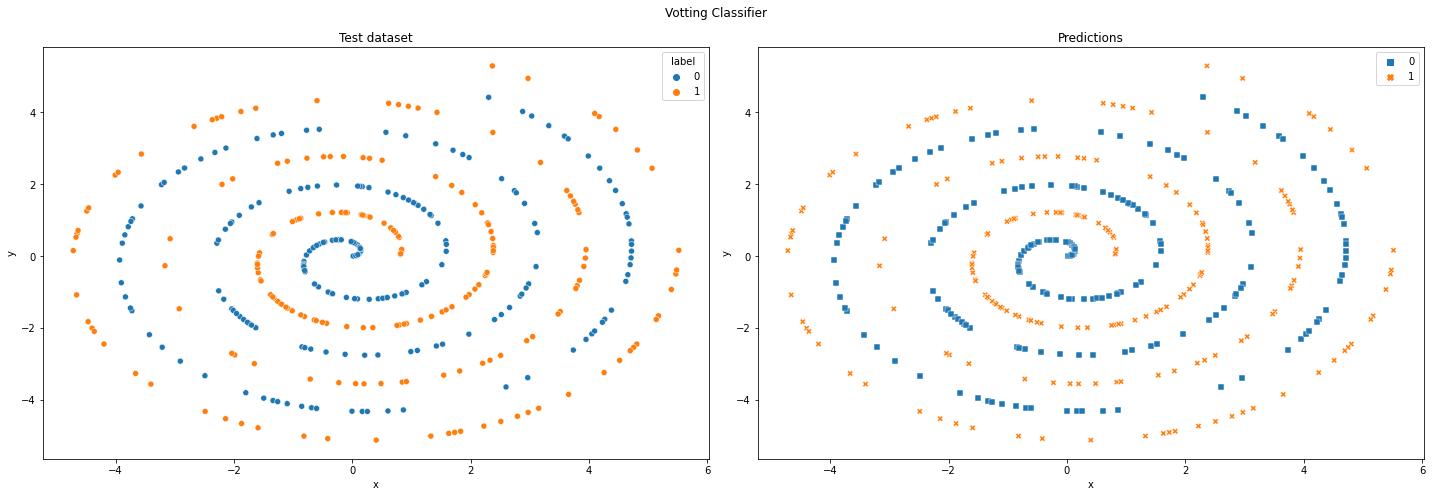

In [85]:
test_plot(y_pred_votting, 'Votting Classifier')

### Matrizes de confusão

In [112]:
import itertools

def plot_conf_matrix(conf_matrix, title, ax):  
    cax = ax.matshow(conf_matrix, cmap='magma')

    thresh = 100
    for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):   
            ax.text(
                j, i, '{:,}'.format(conf_matrix[i, j]),
                horizontalalignment='center',
                fontsize=14,
                color='black' if conf_matrix[i, j] > thresh else 'white'
            )
    
    fig.colorbar(cax, ax=ax)
    labels = [ 0, 1 ]
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    

    accuracy = np.trace(conf_matrix) / float(np.sum(conf_matrix))
    misclass = 1 - accuracy
    ax.set_title(f'{title}\nAccuracy: {accuracy*100:0.2f}%\n')

    ax.set_xlabel('Predicted')
    ax.set_ylabel('Ground Truth')



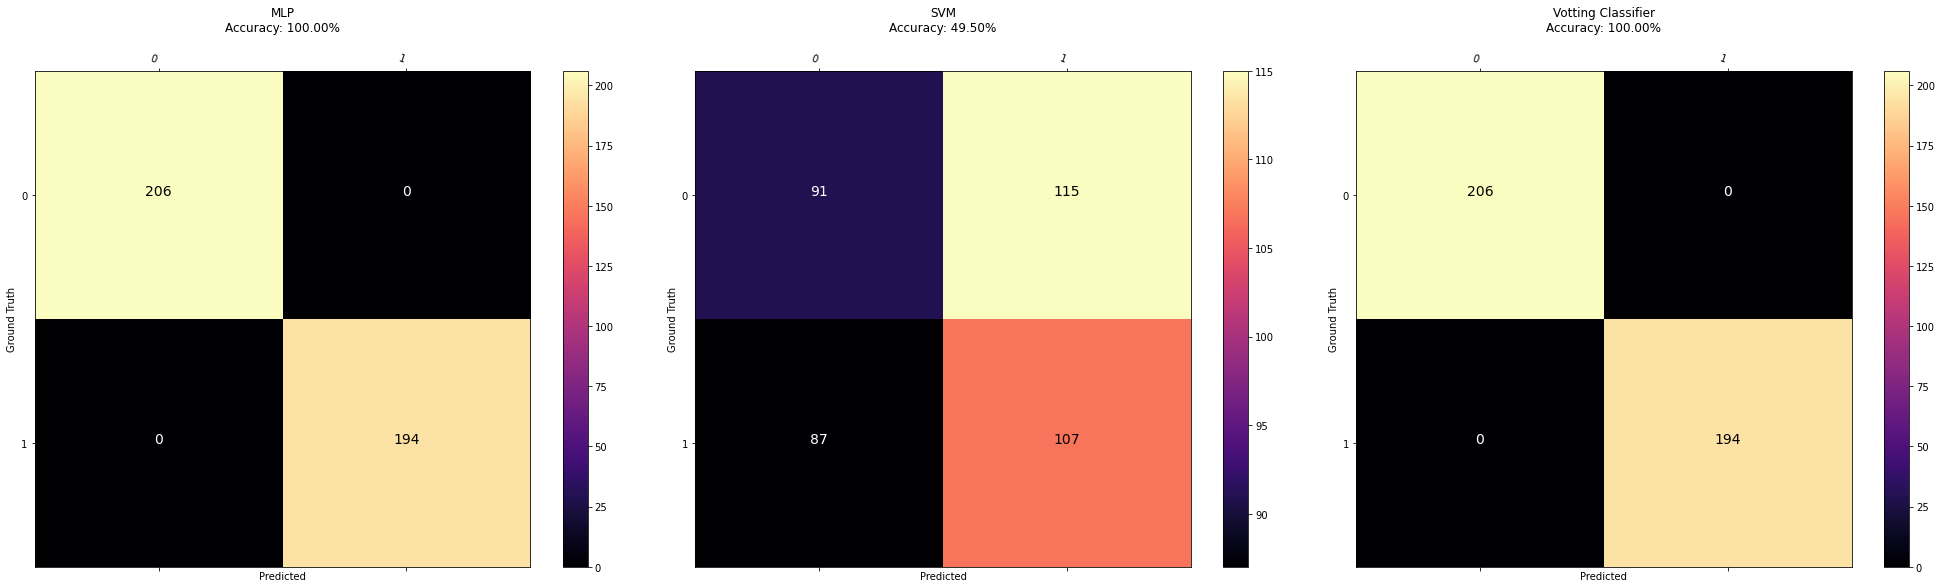

In [113]:
from sklearn.metrics import confusion_matrix

confusion_matrizes = [
    ['MLP', confusion_matrix(y_test, y_pred_mlp)],
    ['SVM', confusion_matrix(y_test, y_pred_svm)],
    ['Votting Classifier', confusion_matrix(y_test, y_pred_votting) ]
]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(28, 8))

index = 0
for col in range(3):
    clf_label, conf_matrix = confusion_matrizes[index]

    plot_conf_matrix(conf_matrix, clf_label, axes[col])

    index += 1

fig.autofmt_xdate(rotation=-20)
plt.tight_layout()
plt.show()